# Taiwan House Price Prediction

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

data = pd.read_excel("realestate_taiwan.xlsx")
data.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [41]:
data.shape

(414, 8)

In [42]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [43]:
data = data.drop(['No','X1 transaction date','X5 latitude','X6 longitude'],axis=1)

In [44]:
data.columns = ['Age', 'Distance to MRT Station', 'No. of Convenience Stores', 'House Price/Meter^2']

In [45]:
data.head()

,Age,Distance to MRT Station,No. of Convenience Stores,House Price/Meter^2
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1


In [46]:
Xs = data.drop(['House Price/Meter^2'], axis=1)
y = data['House Price/Meter^2'].values.reshape(-1,1)
 
x_train, x_test, y_train, y_test = train_test_split(Xs,y,random_state=1) 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
reg = LinearRegression()
reg.fit(x_train, y_train)


(310, 3)
(104, 3)
(310, 1)
(104, 1)


LinearRegression()

In [47]:
print("Slope: ",reg.coef_)
print("Intercept: ",reg.intercept_)

Slope:  [[-0.2156739  -0.0052869   1.27110557]]
Intercept:  [42.55604163]


In [48]:
print("The linear model is: Y = {:.5} + {:.5}*age + {:.5}*MRT-Distance + {:.5}*No-of-Convenience-Stores".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

The linear model is: Y = 42.556 + -0.21567*age + -0.0052869*MRT-Distance + 1.2711*No-of-Convenience-Stores


In [49]:
y_pred = reg.predict(x_test)

# Error Metrics

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions1 = reg.predict(x_test)
mae = mean_absolute_error(y_test,predictions1)
print("Mean Absolute Error = ",mae)


predictions2 = reg.predict(x_test)
mse = mean_squared_error(y_test,predictions2)
print("Mean Squared Error = ",mse)


predictions3 = reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,predictions3))
print("Root Mean Squared Error = ",rmse)

Mean Absolute Error =  5.895169093420213
Mean Squared Error =  61.38219294384636
Root Mean Squared Error =  7.834678866670054


In [51]:
reg.score(Xs, y)

0.5396484731412352

# Visualisation

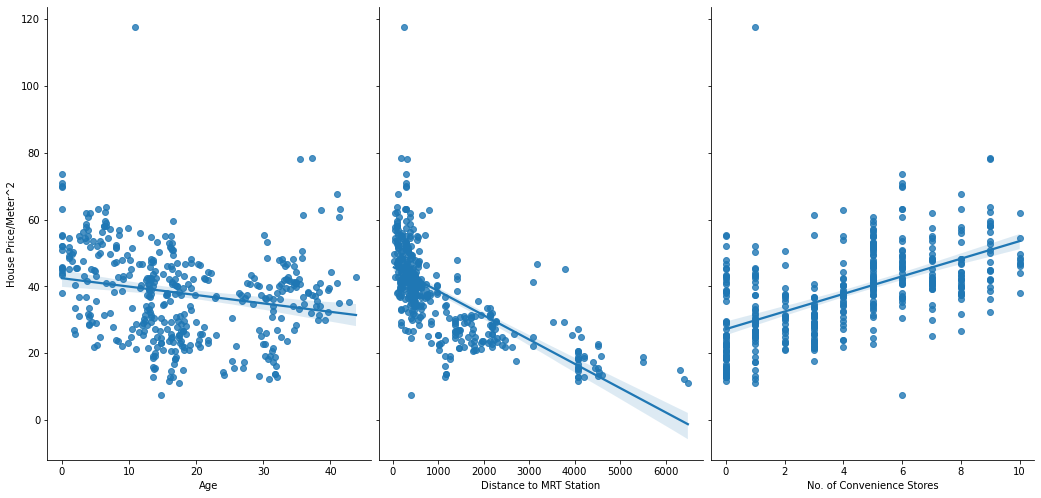

In [52]:
import seaborn as sns
%matplotlib inline

sns.pairplot(data, x_vars=['Age', 'Distance to MRT Station', 'No. of Convenience Stores'], y_vars='House Price/Meter^2', height=7, aspect=0.7, kind='reg')

# Inference

### Price/sq meter of house is most strongly correlated with number of convenience stores nearby

### It is highly negatively correlated with Distance to nearest MRT station, and slightly negatively correlated to age of house